# **Project 2 - Data Cleaning and EDA**

To begin, download the excel dataset (`Current Mortgage Rates Data Since 1971`) from [Freddie Mac](https://www.freddiemac.com/pmms). Then, follow the instructions outlined in this notebook to guide you through the process of cleaning the data and preparing it for analysis.

This notebook focuses on the data cleaning and initial exploratory data analysis of U.S. mortgage interest rates from 1971 to 2024, covering 30-yr, 15-yr, and ARM rates. The raw data was converted into a CSV file, which was then imported into Python for our analysis.

The main sections of this notebook include:

1. *Data Import and Cleaning*: This section outlines the steps for loading the dataset and performing the necessary cleaning tasks to prepare for analysis.

2. *Data Visualizations*: This section presents various visualizations to explore the trends and patterns within the mortgage rate data.

## Section 1 - Data Cleaning

In [13]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# load mortgage rate data from freddie mac website, reading in as excel and converting to csv df
df = pd.DataFrame(pd.read_excel("historicalweeklydata.xlsx"))
df

,Week,U.S. 30 yr FRM,30 yr fees & points,U.S. 15 yr FRM,15 yr fees & points,U.S. 5/1 ARM,5/1 ARM fees & points,U.S. 5/1 ARM margin,30 yr FRM/ 5/1 ARM spread
0,1971-04-02,7.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1971-04-09,7.31,,NaN,NaN,NaN,NaN,NaN,NaN
2,1971-04-16,7.31,,NaN,NaN,NaN,NaN,NaN,NaN
3,1971-04-23,7.31,,NaN,NaN,NaN,NaN,NaN,NaN
4,1971-04-30,7.29,,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2789,2024-09-12,6.20,NaN,5.27,NaN,NaN,NaN,NaN,NaN
2790,2024-09-19,6.09,NaN,5.15,NaN,NaN,NaN,NaN,NaN
2791,2024-09-26,6.08,NaN,5.16,NaN,NaN,NaN,NaN,NaN
2792,2024-10-03,6.12,NaN,5.25,NaN,NaN,NaN,NaN,NaN


In [15]:
# make cleaned df by dropping unwanted columns and then removing all rows with NaN for main analysis later
df_clean = df.drop(columns=['30 yr fees & points', '15 yr fees & points', 'U.S. 5/1 ARM', '5/1 ARM fees & points', 'U.S. 5/1 ARM margin', '30 yr FRM/ 5/1 ARM spread'])
df_clean = df_clean.dropna()
df_clean

,Week,U.S. 30 yr FRM,U.S. 15 yr FRM
1065,1991-08-30,9.15,8.77
1066,1991-09-06,9.14,8.79
1067,1991-09-13,9.02,8.68
1068,1991-09-20,8.95,8.62
1069,1991-09-27,8.92,8.59
...,...,...,...
2789,2024-09-12,6.20,5.27
2790,2024-09-19,6.09,5.15
2791,2024-09-26,6.08,5.16
2792,2024-10-03,6.12,5.25


## Section 2 - EDA

In [16]:
# summary statistics on cleaned data
df_clean.describe()

,Week,U.S. 30 yr FRM,U.S. 15 yr FRM
count,1729,1729.000000,1729.000000
mean,2008-03-20 08:28:52.330827008,5.800145,5.235662
min,1991-08-30 00:00:00,2.650000,2.100000
25%,1999-12-10 00:00:00,4.170000,3.370000
50%,2008-03-20 00:00:00,6.010000,5.420000
75%,2016-06-30 00:00:00,7.110000,6.650000
max,2024-10-10 00:00:00,9.250000,8.890000
std,NaN,1.693495,1.795265


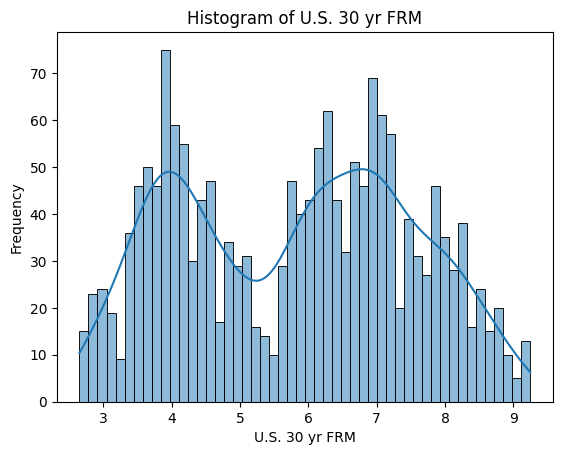

In [17]:
# frequency table for 30-yr FRM
sns.histplot(df_clean['U.S. 30 yr FRM'], bins=50, kde=True)
plt.xlabel('U.S. 30 yr FRM')
plt.ylabel('Frequency')
plt.title('Histogram of U.S. 30 yr FRM')
plt.show()

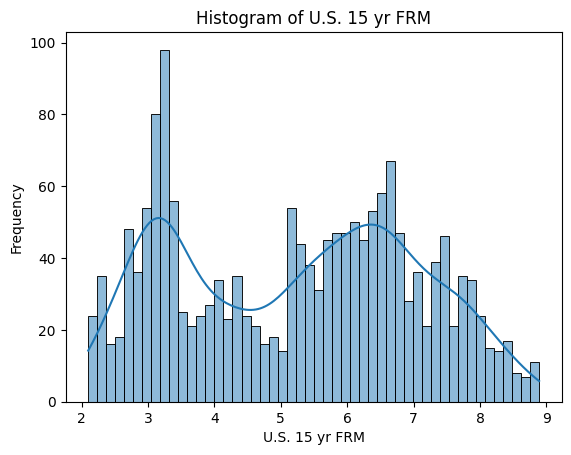

In [18]:
# frequency table for 15-yr FRM
sns.histplot(df_clean['U.S. 15 yr FRM'], bins=50, kde=True)
plt.xlabel('U.S. 15 yr FRM')
plt.ylabel('Frequency')
plt.title('Histogram of U.S. 15 yr FRM')
plt.show()

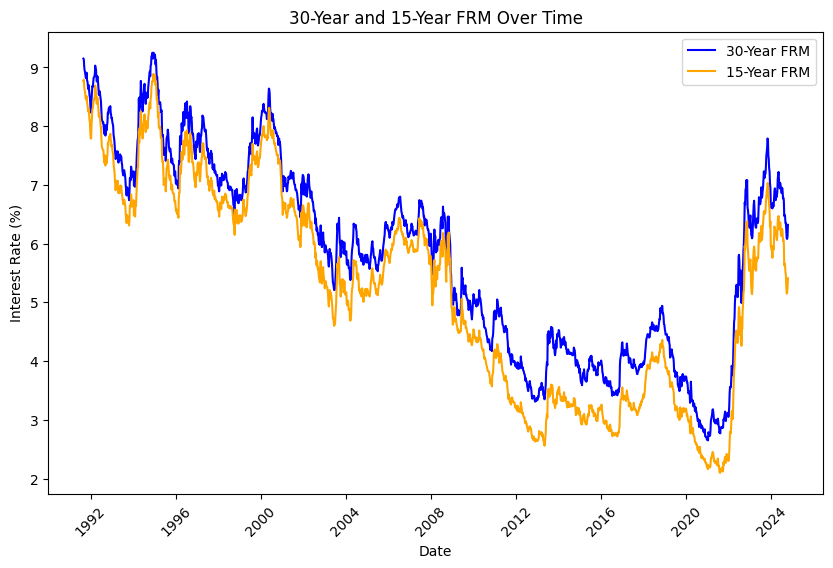

In [19]:
# plot linegraph of FRM over time

# convert the 'Week' to datetime format
df_clean['Week'] = pd.to_datetime(df['Week'])

# plot the 30-yr and 15-yr FRM on the same graph
plt.figure(figsize=(10, 6))  # Optional: Set the size of the plot
plt.plot(df_clean['Week'], df_clean['U.S. 30 yr FRM'], label='30-Year FRM', color='blue')
plt.plot(df_clean['Week'], df_clean['U.S. 15 yr FRM'], label='15-Year FRM', color='orange')
plt.title('30-Year and 15-Year FRM Over Time')
plt.xlabel('Date')
plt.ylabel('Interest Rate (%)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

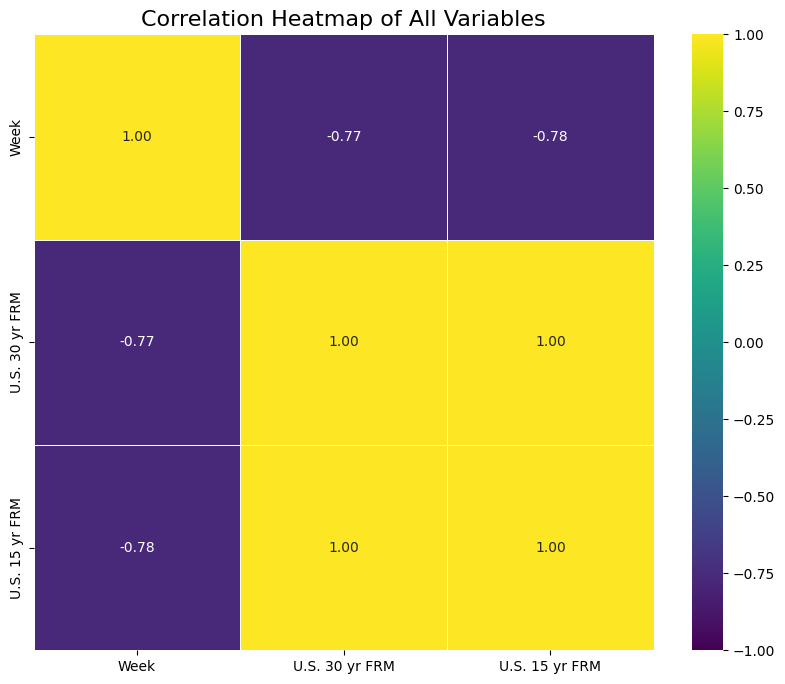

In [20]:
# plot the correlation between all variables in cleaned df
corr_matrix = df_clean.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1, linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap of All Variables', fontsize=16)
plt.show()


In [21]:
# export cleaned df to new csv
df_clean.to_csv('cleaned_df.csv')